# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1,2,3,4,5,6,7,8,9], verbose=True)

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.40412
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.49935
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.41915
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.34529
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.33864
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.36990
	Train loss: 0.04362, Accuracy: 460/1692 (27.19%)
	Validation loss: 0.00330, Accuracy: 117/423 (27.66%)
	Test loss: 0.00314, Accuracy: 118/443 (26.64%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.38965
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.39425
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.35069
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.40820
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.34062
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.41581
	Train loss: 0.04350, Accuracy: 462/1692 (27.30%)
	Validation loss: 0.00332, Accuracy: 110/42

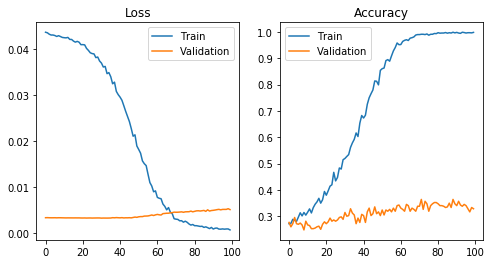

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.48269
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.42255
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.41290
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.37290
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.40694
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.49067
	Train loss: 0.04342, Accuracy: 451/1692 (26.65%)
	Validation loss: 0.00332, Accuracy: 89/423 (21.04%)
	Test loss: 0.00315, Accuracy: 102/443 (23.02%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.46186
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.38992
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.39906
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.35079
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.44760
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.46715
	Train loss: 0.04317, Accuracy: 479/1692 (28.31%)
	Validation loss: 0.00331, Accuracy: 90/423 

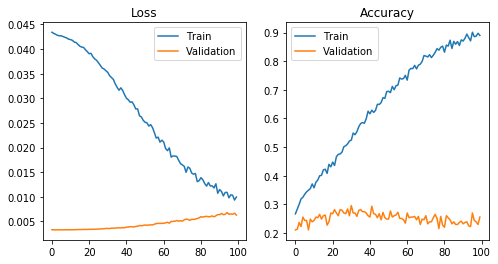

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## GRU

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.46978
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.46479
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.38789
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.43300
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.41300
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.36273
	Train loss: 0.04353, Accuracy: 466/1692 (27.54%)
	Validation loss: 0.00331, Accuracy: 109/423 (25.77%)
	Test loss: 0.00316, Accuracy: 110/443 (24.83%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.46231
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.47586
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.36281
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.41151
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.50655
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.40276
	Train loss: 0.04318, Accuracy: 447/1692 (26.42%)
	Validation loss: 0.00331, Accuracy: 99/423

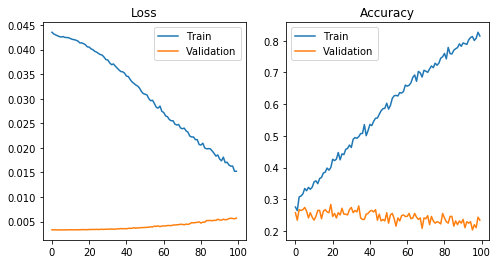

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## CNN + LSTM

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.38706
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.39128
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.38681
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.39001
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.38722
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.37998
	Train loss: 0.04336, Accuracy: 458/1692 (27.07%)
	Validation loss: 0.00327, Accuracy: 128/423 (30.26%)
	Test loss: 0.00313, Accuracy: 111/443 (25.06%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.38579
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.38267
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.38471
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.36230
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.35617
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.31852
	Train loss: 0.04204, Accuracy: 588/1692 (34.75%)
	Validation loss: 0.00320, Accuracy: 141/42

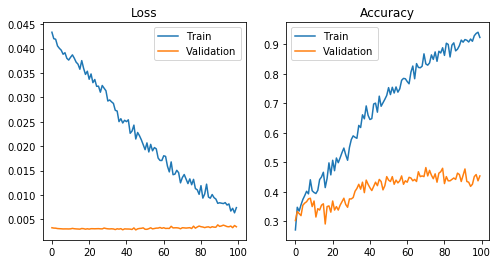

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## CNN + GRU

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.39187
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.39417
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.39754
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.38685
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.37070
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.37474
	Train loss: 0.04309, Accuracy: 496/1692 (29.31%)
	Validation loss: 0.00325, Accuracy: 120/423 (28.37%)
	Test loss: 0.00310, Accuracy: 123/443 (27.77%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.37358
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.39494
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.37944
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.34335
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.34306
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.31966
	Train loss: 0.04167, Accuracy: 593/1692 (35.05%)
	Validation loss: 0.00316, Accuracy: 147/42

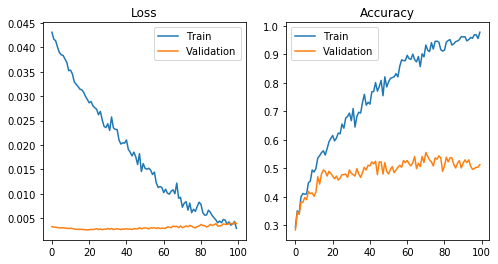

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)